# 1. Création d'un modèle de référence 

## Préparation du jeu de données

> Téléchargement des fichiers puis décompression.

In [1]:
!pip uninstall tensorflow
!pip install tensorflow==2.5.0

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.6.0
     |████████████████████████████████| 454.3 MB 14 kB/s 
     |████████████████████████████████| 1.2 MB 60.5 MB/s 
     |████████████████████████████████| 4.0 MB 63.0 MB/s 
     |████████████████████████████████| 462 kB 74.6 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    F

* Tensorflow avec GPU. Ici nous utilisons le TPU permettant un meilleur entrainement des modèles

In [2]:
import tensorflow as tf

In [3]:
!wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_gtFine_trainvaltest.zip"
!wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_leftImg8bit_trainvaltest.zip"

--2021-08-29 09:18:43--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_gtFine_trainvaltest.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.120.96
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.120.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/zip]
Saving to: ‘P8_Cityscapes_gtFine_trainvaltest.zip’

P8_Cityscapes_gtFin 100%[===================>] 240.87M  29.0MB/s    in 9.1s    

2021-08-29 09:18:53 (26.6 MB/s) - ‘P8_Cityscapes_gtFine_trainvaltest.zip’ saved [252567705/252567705]

--2021-08-29 09:18:53--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_leftImg8bit_trainvaltest.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-

In [4]:
!unzip P8_Cityscapes_gtFine_trainvaltest.zip
!unzip P8_Cityscapes_leftImg8bit_trainvaltest.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 extracting: leftImg8bit/train/jena/jena_000074_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000040_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000020_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000030_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000059_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000100_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000034_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000089_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000104_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000080_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_00000

In [5]:
import numpy as np
from tensorflow import keras
import warnings
import glob
import cv2
warnings.filterwarnings('ignore')


train_img = glob.glob('/content/leftImg8bit/train/*/*.png')
train_label = glob.glob('/content/gtFine/train/*/*_gtFine_labelIds.png')
img_names = [path.split('/train/')[1].split('_leftImg8bit.png')[0] for path in train_img]
train_label = ['/content/gtFine/train/' + name + '_gtFine_labelIds.png' for name in img_names]

len(train_img), len(train_label)

(2975, 2975)

* Fichiers des images et des labels d'entrainement 

In [6]:
index = np.random.permutation(2975)
train_img = np.array(train_img)[index]
train_label = np.array(train_label)[index]

train_img[:5], train_label[:5]

(array(['/content/leftImg8bit/train/aachen/aachen_000028_000019_leftImg8bit.png',
        '/content/leftImg8bit/train/dusseldorf/dusseldorf_000025_000019_leftImg8bit.png',
        '/content/leftImg8bit/train/hanover/hanover_000000_013094_leftImg8bit.png',
        '/content/leftImg8bit/train/bremen/bremen_000206_000019_leftImg8bit.png',
        '/content/leftImg8bit/train/erfurt/erfurt_000020_000019_leftImg8bit.png'],
       dtype='<U88'),
 array(['/content/gtFine/train/aachen/aachen_000028_000019_gtFine_labelIds.png',
        '/content/gtFine/train/dusseldorf/dusseldorf_000025_000019_gtFine_labelIds.png',
        '/content/gtFine/train/hanover/hanover_000000_013094_gtFine_labelIds.png',
        '/content/gtFine/train/bremen/bremen_000206_000019_gtFine_labelIds.png',
        '/content/gtFine/train/erfurt/erfurt_000020_000019_gtFine_labelIds.png'],
       dtype='<U87'))

* Fichier des images et des labels de validation :

In [7]:
val_img = glob.glob('/content/leftImg8bit/val/*/*.png')
val_label = glob.glob('/content/gtFine/val/*/*_gtFine_labelIds.png')
img_names = [path.split('/val/')[1].split('_leftImg8bit.png')[0] for path in val_img]
val_label = ['/content/gtFine/val/' + name + '_gtFine_labelIds.png' for name in img_names]

len(val_img), len(val_label)

(500, 500)

* Fichier des images et des labels de test :

In [8]:
test_img = glob.glob('/content/leftImg8bit/test/*/*.png')
test_label = glob.glob('/content/gtFine/test/*/*_gtFine_labelIds.png')
img_names = [path.split('/test/')[1].split('_leftImg8bit.png')[0] for path in test_img]
test_label = ['/content/gtFine/test/' + name + '_gtFine_labelIds.png' for name in img_names]

len(test_img), len(test_label)

(1525, 1525)

In [9]:
import tensorflow as tf

train_ds = tf.data.Dataset.from_tensor_slices((train_img, train_label))
val_ds = tf.data.Dataset.from_tensor_slices((val_img, val_label))
test_ds = tf.data.Dataset.from_tensor_slices((test_img, test_label))

* Méthode de lecture des images et des labels et transformation en tenseur

In [10]:
def read_png(img):
    img = tf.io.read_file(img)
    img = tf.image.decode_png(img, channels=3)
    return img
    
def read_png_label(img):
    img = tf.io.read_file(img)
    img = tf.image.decode_png(img, channels=1)
    return img

## Traitement des images

In [11]:
import imgaug as ia
import cv2
import imgaug.augmenters as iaa
from tensorflow.python.keras.preprocessing import image


seq = iaa.Sequential([iaa.Crop(px=(0, 16)),
                      iaa.Fliplr(0.5), 
                      iaa.GaussianBlur(sigma=(0, 3.0))
])


def augment_seg(img, label):

	  aug_det = seq.to_deterministic()	
	  image_aug = aug_det.augment_image(img)
	  segmap = ia.SegmentationMapOnImage(label, nb_classes=np.max(label)+1,
                                       shape=img.shape )
	  label_aug = aug_det.augment_segmentation_maps(segmap)
	  label_aug = segmap_aug.get_arr_int()

	  return image_aug , label_aug

def rand_crop(img, label):
    concat_img = tf.concat([img, label], axis=-1)
    concat_img = tf.image.resize(concat_img, [280, 560],
                                 method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    crop_img = tf.image.random_crop(concat_img, [256, 256, 4])

    return crop_img[:, :, :3], crop_img[:, :, 3:]


def norm(img, label):
    img = tf.cast(img, tf.float32)/127.5-1
    label = tf.cast(label, tf.int32)

    return img, label


def load_img_train(img, label):
    img = read_png(img)
    label = read_png_label(label)
    
    img, label = rand_crop(img, label)
    
    if tf.random.uniform(()) > 0.5:
        img = tf.image.flip_left_right(img)
        label = tf.image.flip_left_right(label)
    
    return norm(img, label)


def load_img_train_aug(img, label):

    img = read_png(img)
    label = read_png_label(label)
    
    img, label = rand_crop(img, label)

    if tf.random.uniform(()) > 0.5:
      img = tf.image.random_flip_left_right(img)
      label = tf.image.random_flip_left_right(label)
      img = tf.image.random_flip_up_down(img)
      label = tf.image.random_flip_up_down(label)
      img = tf.image.random_brightness(img, 0.2)
      label = tf.image.random_brightness(label, 0.2)
      img = tf.image.random_contrast(img, 0.2, 0.5)
      label = tf.image.random_contrast(label, 0.2, 0.5)
      img = tf.image.rot90(img, k=1, name=None)
      label = tf.image.rot90(label, k=1, name=None)
    
    return norm(img, label)

def load_img_val(img, label):
    img = read_png(img)
    label = read_png_label(label)
    
    img = tf.image.resize(img, [256, 256])
    label = tf.image.resize(label, [256, 256])

    return norm(img, label)

def load_img_test(img, label):
    img = read_png(img)
    label = read_png_label(label)
    
    img = tf.image.resize(img, [256, 256])
    label = tf.image.resize(label, [256, 256])

    return norm(img, label)

* Pré-traitement des images :

In [12]:
BATCH_SIZE = 32
BUFFER_SIZE = 300
steps_per_epoch = 2975 // BATCH_SIZE
validation_steps = 500 // BATCH_SIZE
auto = tf.data.experimental.AUTOTUNE

train_ds_aug = train_ds
train_ds = train_ds.map(load_img_train, num_parallel_calls=auto)
train_ds_aug = train_ds_aug.map(load_img_train_aug, num_parallel_calls=auto)
val_ds = val_ds.map(load_img_val, num_parallel_calls=auto)
test_ds = test_ds.map(load_img_test, num_parallel_calls=auto)

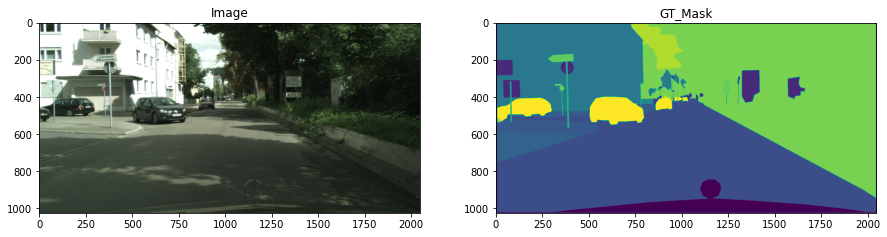

In [13]:
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt

i = 100
test_image = image.img_to_array(image.load_img(f'{train_img[i]}'))/255.
test_mask = image.img_to_array(image.load_img(f'{train_label[i]}', grayscale=True))
test_mask = np.squeeze(test_mask)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(test_image)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('GT_Mask')
ax1.imshow(test_mask)

* Générateur de données en temps réel pour alimenter le modèle

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing import image
from tensorflow.keras.utils import Sequence
import os

cats = {'void': [0, 1, 2, 3, 4, 5, 6],
        'flat': [7, 8, 9, 10],
        'construction': [11, 12, 13, 14, 15, 16],
        'object': [17, 18, 19, 20],
        'nature': [21, 22],
        'sky': [23],
        'human': [24, 25],
        'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]}

img_height, img_width = 256, 256
classes = 8
batch_size = 32
filters_n = 64

image_list_train = []
mask_list_train = []
for img, label in train_ds:
    image_list_train.append(img)
    mask_list_train.append(label)
print(f'. . . . .Number of train images: {len(image_list_train)}\n. . . . .Number of train masks: {len(mask_list_train)}')


image_list_val = []
mask_list_val = []
for img, label in val_ds:
    image_list_val.append(img)
    mask_list_val.append(label)
print(f'. . . . .Number of val images: {len(image_list_val)}\n. . . . .Number of val masks: {len(mask_list_val)}')

image_list_test = []
mask_list_test = []
for img, label in test_ds:
    image_list_test.append(img)
    mask_list_test.append(label)
print(f'. . . . .Number of val images: {len(image_list_test)}\n. . . . .Number of val masks: {len(mask_list_test)}')


class DataGenerator_train(Sequence):


    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))


    def __getitem__(self, idx):

        idx = np.random.randint(0, len(self.x), batch_size)
        batch_x, batch_y = [], []
        drawn = 0
        for i in idx:
            _image = image_list_train[i]
            img = mask_list_train[i]
            labels = np.unique(img)            
            if len(labels) < 3:
                idx = np.random.randint(0, len(self.x), batch_size-drawn)
                continue
            img = np.squeeze(img)
            mask = np.zeros((img.shape[0], img.shape[1], 8))
            for i in range(-1, 34):
                if i in cats['void']:
                    mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
                elif i in cats['flat']:
                    mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
                elif i in cats['construction']:
                    mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
                elif i in cats['object']:
                    mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
                elif i in cats['nature']:
                    mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
                elif i in cats['sky']:
                    mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
                elif i in cats['human']:
                    mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
                elif i in cats['vehicle']:
                    mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))

            mask = np.resize(mask,(img_height, img_width, 8))
            batch_y.append(mask)
            batch_x.append(_image)
            drawn += 1
        return np.array(batch_x), np.array(batch_y)

class DataGenerator_val(Sequence):


    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))


    def __getitem__(self, idx):

        idx = np.random.randint(0, len(self.x), batch_size)
        batch_x, batch_y = [], []
        drawn = 0
        for i in idx:
            _image = image_list_val[i]
            img = mask_list_val[i]
            labels = np.unique(img)            
            if len(labels) < 3:
                idx = np.random.randint(0, len(self.x), batch_size-drawn)
                continue
            img = np.squeeze(img)
            mask = np.zeros((img.shape[0], img.shape[1], 8))
            for i in range(-1, 34):
                if i in cats['void']:
                    mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
                elif i in cats['flat']:
                    mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
                elif i in cats['construction']:
                    mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
                elif i in cats['object']:
                    mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
                elif i in cats['nature']:
                    mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
                elif i in cats['sky']:
                    mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
                elif i in cats['human']:
                    mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
                elif i in cats['vehicle']:
                    mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))

            mask = np.resize(mask,(img_height, img_width, 8))
            batch_y.append(mask)
            batch_x.append(_image)
            drawn += 1
        return np.array(batch_x), np.array(batch_y)


class DataGenerator_test(Sequence):


    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))


    def __getitem__(self, idx):

        idx = np.random.randint(0, len(self.x), batch_size)
        batch_x, batch_y = [], []
        drawn = 0
        for i in idx:
            _image = image_list_test[i]
            img = mask_list_test[i]
            labels = np.unique(img)            
            if len(labels) < 3:
                idx = np.random.randint(0, len(self.x), batch_size-drawn)
                continue
            img = np.squeeze(img)
            mask = np.zeros((img.shape[0], img.shape[1], 8))
            for i in range(-1, 34):
                if i in cats['void']:
                    mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
                elif i in cats['flat']:
                    mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
                elif i in cats['construction']:
                    mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
                elif i in cats['object']:
                    mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
                elif i in cats['nature']:
                    mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
                elif i in cats['sky']:
                    mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
                elif i in cats['human']:
                    mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
                elif i in cats['vehicle']:
                    mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))

            mask = np.resize(mask,(img_height, img_width, 8))
            batch_y.append(mask)
            batch_x.append(_image)
            drawn += 1
        return np.array(batch_x), np.array(batch_y)


train_generator = DataGenerator_train(image_list_train, mask_list_train, batch_size)
val_generator = DataGenerator_val(image_list_val, mask_list_val, batch_size)
test_generator = DataGenerator_test(image_list_test, mask_list_test, batch_size)

. . . . .Number of train images: 2975
. . . . .Number of train masks: 2975
. . . . .Number of val images: 500
. . . . .Number of val masks: 500
. . . . .Number of val images: 1525
. . . . .Number of val masks: 1525


## Modèle SVM pour la ségmentation sémantique 

Cet algorithme est adapté pour les petits jeux de données. Il accepte en entrée des modèles de dimensions 2 au lieu de 4.

### Formatage des données d'entrée :

In [ ]:
import pandas as pd
training_data = []

IMG_SIZE = 256

df = pd.DataFrame()

def create_training_data():
    for x, item in enumerate(train_img):
        image = cv2.imread(train_img[x])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.reshape(-1)
        df['image'] = image
        mask = cv2.imread(train_label[x])
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = np.resize(mask, (IMG_SIZE, IMG_SIZE))
        mask = mask.reshape(-1)
        df['label'] = mask 
        training_data.append([image, mask])

create_training_data()

In [ ]:
y = df['label'].values
X = df.drop(labels= ['label'], axis=1)

### Création des jeux d'entrainement et de test :

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Entrainement du modèle

In [ ]:
param_grid={'C':[0.1, 1, 10, 100], 
            'gamma':[0.0001, 0.001, 0.1,1],
            'kernel':['rbf', 'poly']}

score_1 = 'accuracy'
score_2 = 'jaccard'
score_3 =  'neg_log_loss'


svc = SVC(max_iter=800, probability=True)
model = GridSearchCV(svc, param_grid, cv=3, scoring=score_1)
%time model.fit(X_train, y_train)

CPU times: user 30min 51s, sys: 16.7 s, total: 31min 8s
Wall time: 31min


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=800,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### Performance du modèle

* **Accuracy**

In [ ]:
from sklearn import metrics

y_pred = model.predict(X_test)
print("Accuracy ", metrics.accuracy_score(y_test, y_pred))

Accuracy  0.683891968872387


* **Rapport de classification**

In [ ]:
print("Classification report ", metrics.classification_report(y_test, y_pred))

Classification report                precision    recall  f1-score   support

           3       0.00      0.00      0.00      3211
          11       0.43      0.00      0.00      1301
          20       0.00      0.00      0.00      1509
          21       0.70      0.98      0.82     12495
          23       0.54      1.00      0.70      1145

    accuracy                           0.68     19661
   macro avg       0.33      0.40      0.31     19661
weighted avg       0.51      0.68      0.56     19661



* **Hyper-paramètres optimales**

In [ ]:
print("The optimal parameters are {} with a score  \
       of {:.4f}".format(model.best_params_, model.best_score_))

The optimal parameters are {'C': 100, 'gamma': 1, 'kernel': 'poly'} with a score         of 0.6872


* **F1-score et F50-mesure**

In [ ]:
from sklearn.metrics import f1_score, fbeta_score

f1 = f1_score(y_test, y_pred, average='weighted')
fbeta = fbeta_score(y_test, y_pred, beta=50, average='weighted')
print("F-mesure               : {:.4f}".format(f1))
print("F50-mesure             : {:.4f}".format(fbeta))

F-mesure               : 0.5616
F50-mesure             : 0.6838


* **Indice de Jaccard**

In [ ]:
print("Indice de Jaccard ", metrics.jaccard_score(y_test, y_pred, average='weighted'))

Indice de Jaccard  0.47223271098785097


* **Fonction de perte**

In [ ]:
y_pred_prob = model.predict_proba(X_test)

print("Log Loss ", metrics.log_loss(y_test, y_pred_prob))

Log Loss  1.1072729869195634


# 2. **Augmentation** d'images

In [15]:
IMAGE_AUGMENTATION = True #@param {type:"boolean"}
BATCH_SIZE =  32#@param {type:"integer"}
EPOCHS = 20 #@param {type:"integer"}
IMG_HEIGHT, IMG_WIDTH = 256, 256
class_nb = 8
steps_per_epoch = 2975 // BATCH_SIZE
validation_steps = 500 // BATCH_SIZE

In [16]:
!pip install albumentations==1.0.0

     |████████████████████████████████| 98 kB 3.7 MB/s 
     |████████████████████████████████| 37.1 MB 119 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [17]:
!pip install segmentation_models

     |████████████████████████████████| 50 kB 4.4 MB/s 


* Enregistrement des images et labels dans un fichier spécifique dans le drive

In [ ]:
i = 0
for x, item in enumerate(train_img):
    i += 1
    image = cv2.imread(train_img[x])
    mask = cv2.imread(train_label[x])
    cv2.imwrite("/content/data/train/image/img/img_%s.png" % i, image)
    cv2.imwrite("/content/data/train/mask/img/img_%s.png"  % i, mask)

i = 0
for x, item in enumerate(val_img):
    i += 1
    image = cv2.imread(val_img[x])
    mask = cv2.imread(val_label[x])
    cv2.imwrite("/content/data/val/image/img/img_%s.png" % i, image)
    cv2.imwrite("/content/data/val/mask/img/img_%s.png"  % i, mask)

i = 0
for x, item in enumerate(test_img):
    i += 1
    image = cv2.imread(test_img[x])
    mask = cv2.imread(test_label[x])
    cv2.imwrite("/content/data/test/image/img/img_%s.png" % i, image)
    cv2.imwrite("/content/data/test/mask/img/img_%s.png"  % i, mask)


In [ ]:
    CLASS_REF = [
        'void',
        'flat',
        'construction',
        'object',
        'nature',
        'sky',
        'human',
        'vehicle'
    ]
CLASS_CHOICE = CLASS_REF

image_dir = '/content/data/train/image/img/'
mask_dir  = '/content/data/train/mask/img/'

val_image_dir = '/content/data/val/image/img/'
val_mask_dir =  '/content/data/val/mask/img/'

test_image_dir = '/content/data/test/image/img/'
test_mask_dir =  '/content/data/test/mask/img/'


CLASS_NB = len(CLASS_CHOICE)
print('•• Nombre de classes = {}'.format(CLASS_NB))

* Générateur de données en temps réel

In [18]:
cats = {'void': [0, 1, 2, 3, 4, 5, 6],
        'flat': [7, 8, 9, 10],
        'construction': [11, 12, 13, 14, 15, 16],
        'object': [17, 18, 19, 20],
        'nature': [21, 22],
        'sky': [23],
        'human': [24, 25],
        'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]}

img_height, img_width = 256, 256
classes = 8
batch_size = 32


image_list_train_aug = []
mask_list_train_aug = []
for img, label in train_ds_aug:
    image_list_train_aug.append(img)
    mask_list_train_aug.append(label)
print(f'. . . . .Number of train images aug: {len(image_list_train_aug)}\n. . . . .Number of train masks aug: {len(mask_list_train_aug)}')


print(f'. . . . .Number of val images: {len(image_list_val)}\n. . . . .Number of val masks: {len(mask_list_val)}')


class DataGen_train(Sequence):


    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))


    def __getitem__(self, idx):

        idx = np.random.randint(0, len(self.x), batch_size)
        batch_x, batch_y = [], []
        drawn = 0
        for i in idx:
            _image = image_list_train_aug[i]
            img = mask_list_train_aug[i]
            labels = np.unique(img)            
            if len(labels) < 3:
                idx = np.random.randint(0, len(self.x), batch_size-drawn)
                continue
            img = np.squeeze(img)
            mask = np.zeros((img.shape[0], img.shape[1], 8))
            for i in range(-1, 34):
                if i in cats['void']:
                    mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
                elif i in cats['flat']:
                    mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
                elif i in cats['construction']:
                    mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
                elif i in cats['object']:
                    mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
                elif i in cats['nature']:
                    mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
                elif i in cats['sky']:
                    mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
                elif i in cats['human']:
                    mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
                elif i in cats['vehicle']:
                    mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))

            mask = np.resize(mask,(img_height, img_width, 8))
            batch_y.append(mask)
            batch_x.append(_image)
            drawn += 1
        return np.array(batch_x), np.array(batch_y)

class DataGen_val(Sequence):


    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))


    def __getitem__(self, idx):

        idx = np.random.randint(0, len(self.x), batch_size)
        batch_x, batch_y = [], []
        drawn = 0
        for i in idx:
            _image = image_list_val[i]
            img = mask_list_val[i]
            labels = np.unique(img)            
            if len(labels) < 3:
                idx = np.random.randint(0, len(self.x), batch_size-drawn)
                continue
            img = np.squeeze(img)
            mask = np.zeros((img.shape[0], img.shape[1], 8))
            for i in range(-1, 34):
                if i in cats['void']:
                    mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
                elif i in cats['flat']:
                    mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
                elif i in cats['construction']:
                    mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
                elif i in cats['object']:
                    mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
                elif i in cats['nature']:
                    mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
                elif i in cats['sky']:
                    mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
                elif i in cats['human']:
                    mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
                elif i in cats['vehicle']:
                    mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))

            mask = np.resize(mask,(img_height, img_width, 8))
            batch_y.append(mask)
            batch_x.append(_image)
            drawn += 1
        return np.array(batch_x), np.array(batch_y)



train_gen = DataGen_train(image_list_train_aug, mask_list_train_aug, batch_size)
val_gen = DataGen_val(image_list_val, mask_list_val, batch_size)

. . . . .Number of train images aug: 2975
. . . . .Number of train masks aug: 2975
. . . . .Number of val images: 500
. . . . .Number of val masks: 500


In [19]:
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm
sm.set_framework('tf.keras')

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


# 3. Création d'un réseau de neurone convolutionnel


## Architecture Encodeur-Décodeur du modèle Unet :

a) Encodeur : chaque couche de notre encodeur contient 2 couches de convolution utilisant la fonction d'activation ReLu suivies par un max pooling. Le principe de la partie Encodeur est de produire des tenseurs basse dimension contenant toutes les informations spatiales de l'image. 

b) Décodeur : l'idée est de récupérer les tenseurs de basse dimension afin de produire en sortie des cartes de segmentation (segmentation sémantique). L'augmentation de dimension des tenseurs se fait par une couche Upsampling combinée avec une couche de convolution + ReLu et de max pooling.

c) Saut de connexion : des connexions sont faites entre les sorties des couches intermédiaires de convolution de l'encodeur et l'entrée de ces mêmes couches du décodeur.
Ces sauts de connexion permettent de remedier à la perte d'information le long des couches empilées.



In [20]:
!pip install keras-tuner

     |████████████████████████████████| 97 kB 3.1 MB/s 


### a) Encodeur

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D
from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras import backend as K
import kerastuner as kt
from tensorflow.keras.layers import concatenate
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Input
from PIL import Image, ImageOps

K.clear_session()

def cust_unet_model(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH, INPUT_CLASS_NB):
    # INPUT LAYERS
    input_0 = Input(shape=(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH, 3))

    # DOWNSAMPLING LAYERS
    conv_1 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(input_0)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_1)
    pool_1 = MaxPooling2D((2, 2))(conv_1)

    conv_2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_1)
    conv_2 = Dropout(0.2)(conv_2)
    conv_2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_2)
    pool_2 = MaxPooling2D((2, 2))(conv_2)

    conv_3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_2)
    conv_3 = Dropout(0.2)(conv_3)
    conv_3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_3)
  
    # UPSAMPLING LAYERS
    up_1 = concatenate([UpSampling2D((2, 2))(conv_3), conv_2], axis=-1)
    conv_4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up_1)
    conv_4 = Dropout(0.2)(conv_4)
    conv_4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv_4)

    up_2 = concatenate([UpSampling2D((2, 2))(conv_4), conv_1], axis=-1)
    conv_5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up_2)
    conv_5 = Dropout(0.2)(conv_5)
    conv_5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv_5)

    segm_X = Conv2D(INPUT_CLASS_NB, (1, 1), activation='softmax', name='seg')(conv_5)

    unet_model = Model(inputs=[input_0], outputs=[segm_X])
    
    return unet_model

In [22]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
class_nb = 8

model = cust_unet_model(IMG_HEIGHT, IMG_WIDTH , class_nb)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        dropout[0][0]                    
______________________________________________________________________________________________

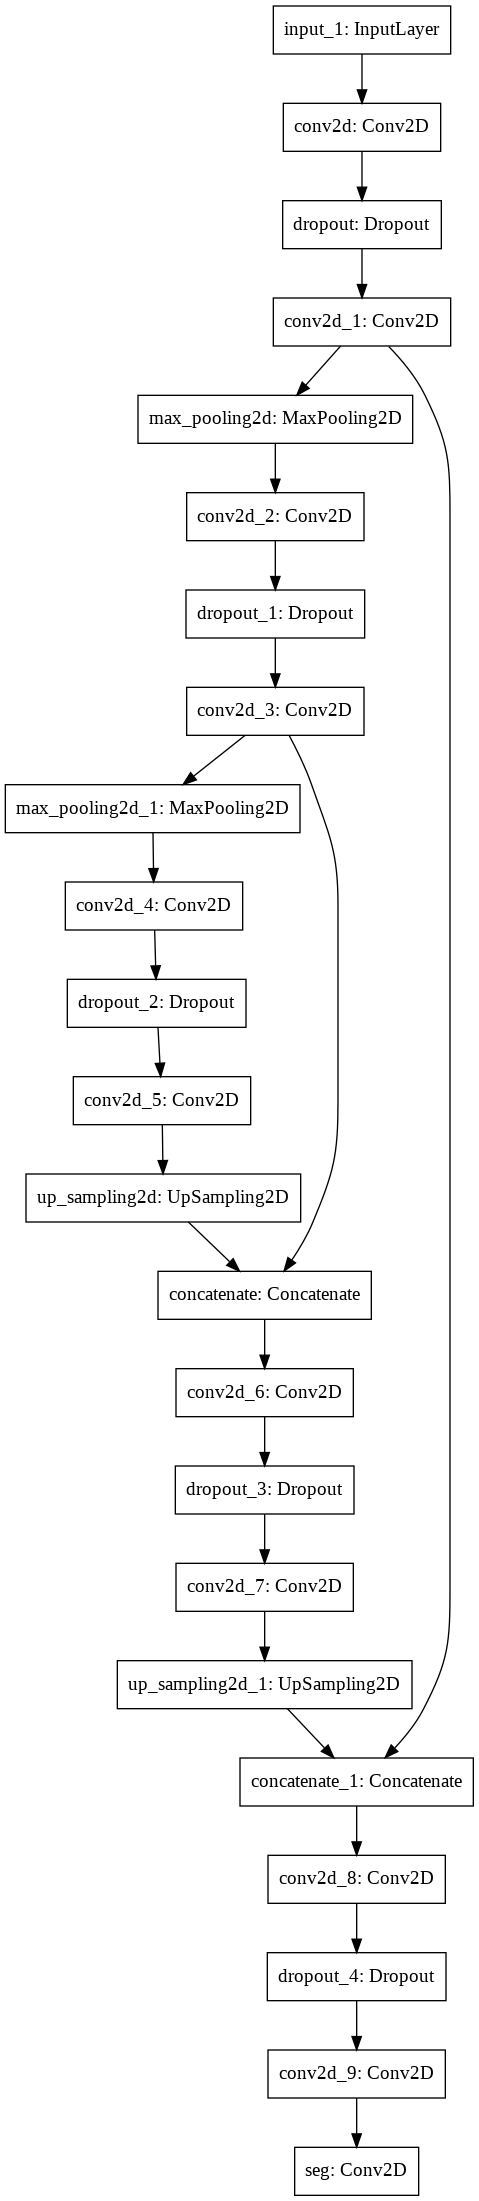

In [23]:
tf.keras.utils.plot_model(model)

### Entrainement du modèle

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

mc = ModelCheckpoint(mode='max', 
                     filepath='/content/models/unet.h5',
                     monitor='iou_score', save_best_only='True', verbose=1)

es = EarlyStopping(mode='max', monitor='iou_score', patience=2, verbose=1)
rl = ReduceLROnPlateau(monitor='loss',
                       patience=2, 
                       cooldown=0)

callbacks_list = [mc, es, rl]

model.compile(
    'Adam',
    loss=sm.losses.categorical_focal_jaccard_loss,
    metrics=[sm.metrics.iou_score, "accuracy"]
)

In [ ]:
batch_size = 32

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps = 500//batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/10
92/92 [==============================] - 810s 9s/step - loss: 0.8649 - iou_score: 0.1752 - accuracy: 0.4566 - val_loss: 0.8354 - val_iou_score: 0.2157 - val_accuracy: 0.5016

Epoch 00001: iou_score improved from -inf to 0.17520, saving model to /content/models/unet.h5
Epoch 2/10
92/92 [==============================] - 763s 8s/step - loss: 0.7220 - iou_score: 0.3154 - accuracy: 0.6415 - val_loss: 0.7423 - val_iou_score: 0.3027 - val_accuracy: 0.6261

Epoch 00002: iou_score improved from 0.17520 to 0.31538, saving model to /content/models/unet.h5
Epoch 3/10
92/92 [==============================] - 742s 8s/step - loss: 0.6562 - iou_score: 0.3799 - accuracy: 0.6959 - val_loss: 0.7022 - val_iou_score: 0.3540 - val_accuracy: 0.6594

Epoch 00003: iou_score improved from 0.31538 to 0.37990, saving model to /content/models/unet.h5
Epoch 4/10
92/92 [==============================] - 529s 6s/step - loss: 0.6069 - iou_score: 0.4271 - accuracy: 0.7426 - val_loss: 0.6972 - val_iou_score:

### Performance du modèle

In [ ]:
best_model_ft = tf.keras.models.load_model('/content/models/unet.h5',
                                        custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                        'iou_score': sm.metrics.iou_score})

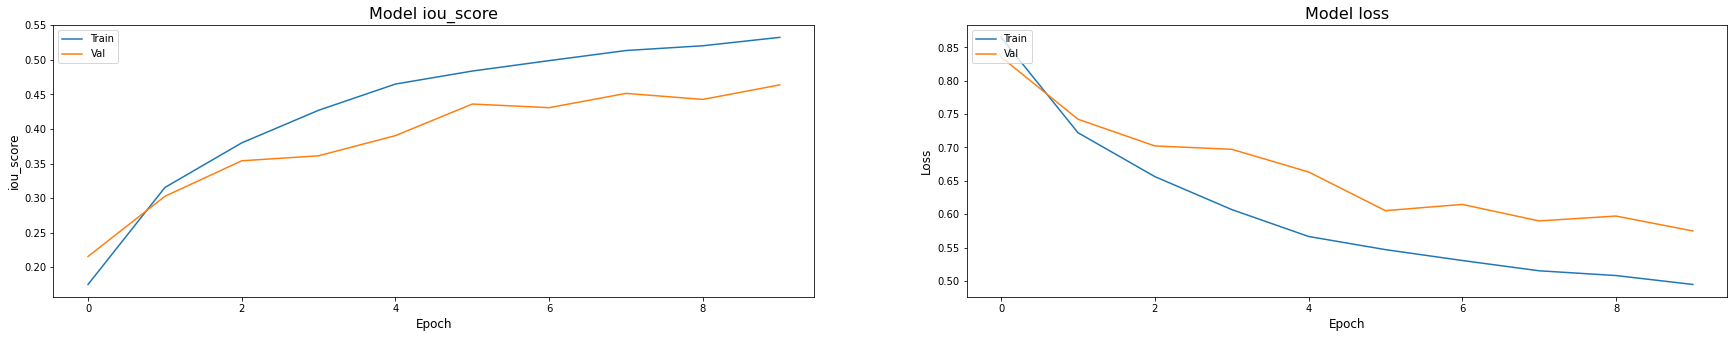

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score', fontsize=16)
plt.ylabel('iou_score', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

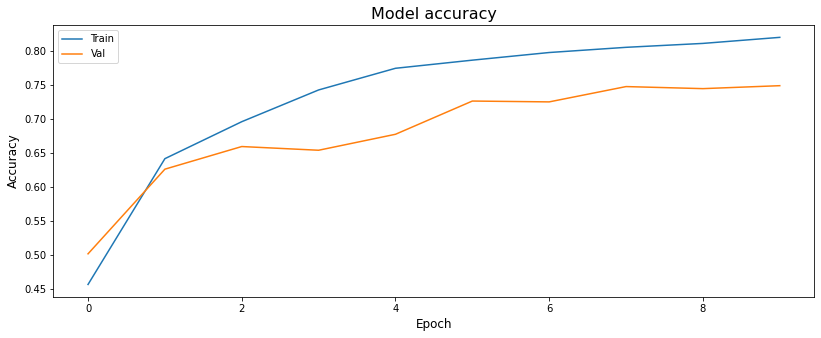

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

### Performance du modèle avec l'augmentation des images

In [ ]:
mc = ModelCheckpoint(mode='max', 
                     filepath='/content/models/unet_aug.h5',
                     monitor='iou_score', save_best_only='True', verbose=1)

es = EarlyStopping(mode='max', monitor='iou_score', patience=2, verbose=1)
rl = ReduceLROnPlateau(monitor='loss',
                       patience=2, 
                       cooldown=0)

callbacks_list = [mc, es, rl]

model.compile(
    'Adam',
    loss=sm.losses.categorical_focal_jaccard_loss,
    metrics=[sm.metrics.iou_score, "accuracy"]
)


batch_size = 32

history = model.fit(train_gen,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_gen,
                    validation_steps = 500//batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/10
92/92 [==============================] - 454s 5s/step - loss: 0.9193 - iou_score: 0.1185 - accuracy: 0.2510 - val_loss: 0.8854 - val_iou_score: 0.1491 - val_accuracy: 0.3794

Epoch 00001: iou_score improved from -inf to 0.11850, saving model to /content/models/unet_aug.h5
Epoch 2/10
92/92 [==============================] - 453s 5s/step - loss: 0.8848 - iou_score: 0.1527 - accuracy: 0.3215 - val_loss: 0.8107 - val_iou_score: 0.2207 - val_accuracy: 0.5464

Epoch 00002: iou_score improved from 0.11850 to 0.15271, saving model to /content/models/unet_aug.h5
Epoch 3/10
92/92 [==============================] - 454s 5s/step - loss: 0.8448 - iou_score: 0.1936 - accuracy: 0.3954 - val_loss: 0.7666 - val_iou_score: 0.2763 - val_accuracy: 0.6084

Epoch 00003: iou_score improved from 0.15271 to 0.19361, saving model to /content/models/unet_aug.h5
Epoch 4/10
92/92 [==============================] - 456s 5s/step - loss: 0.8104 - iou_score: 0.2300 - accuracy: 0.4469 - val_loss: 0.7150 - va

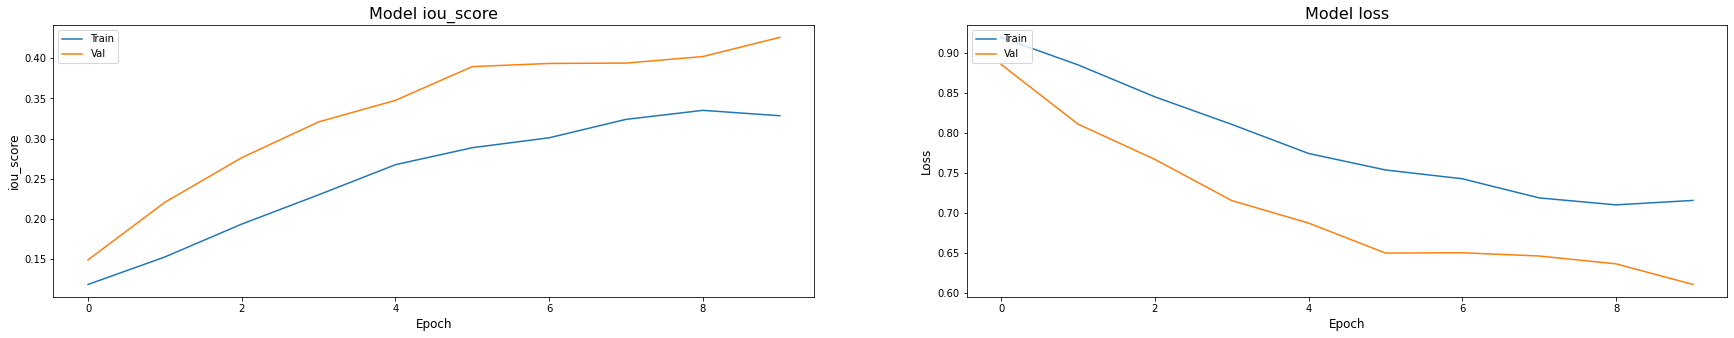

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score', fontsize=16)
plt.ylabel('iou_score', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

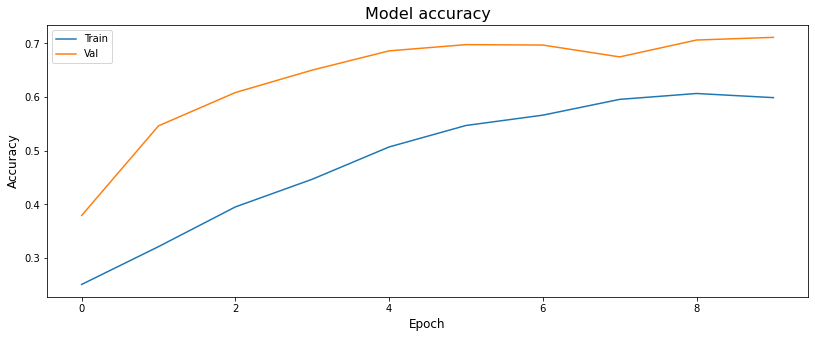

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

## Optimisation des hyperparamètres du modèle Unet :


In [30]:
K.clear_session()
IMG_HEIGHT = 256
IMG_WIDTH = 256
class_nb = 8

K.clear_session()


def build_model(hp):
    # INPUT LAYERS
    input_0 = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

    # DOWNSAMPLING LAYERS
    hp_filters = hp.Choice('num_filters', values=[32, 128], default=32,)
    hp_activation = hp.Choice( "activation", values=["relu", "sigmoid"], default="relu" )
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 


    conv_1 = Conv2D(32, kernel_size=(3, 3), activation=hp_activation, padding='same', kernel_initializer = 'he_normal')(input_0)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = Conv2D(32, kernel_size=(3, 3), activation=hp_activation, kernel_initializer='he_normal', padding='same')(conv_1)
    pool_1 = MaxPooling2D((2, 2))(conv_1)

    conv_2 = Conv2D(32, kernel_size=(3, 3), activation=hp_activation, kernel_initializer='he_normal', padding='same')(pool_1)
    conv_2 = Dropout(0.2)(conv_2)
    conv_2 = Conv2D(32, kernel_size=(3, 3), activation=hp_activation, kernel_initializer='he_normal', padding='same')(conv_2)
    pool_2 = MaxPooling2D((2, 2))(conv_2)

    conv_3 = Conv2D(64, (3, 3), activation=hp_activation, kernel_initializer='he_normal', padding='same')(pool_2)
    conv_3 = Dropout(0.2)(conv_3)
    conv_3 = Conv2D(64, (3, 3), activation=hp_activation, kernel_initializer='he_normal', padding='same')(conv_3)
  
    # UPSAMPLING LAYERS
    up_1 = concatenate([UpSampling2D((2, 2))(conv_3), conv_2], axis=-1)
    conv_4 = Conv2D(32, (3, 3), activation=hp_activation, padding='same')(up_1)
    conv_4 = Dropout(0.2)(conv_4)
    conv_4 = Conv2D(32, (3, 3), activation=hp_activation, padding='same')(conv_4)

    up_2 = concatenate([UpSampling2D((2, 2))(conv_4), conv_1], axis=-1)
    conv_5 = Conv2D(32, (3, 3), activation=hp_activation, padding='same')(up_2)
    conv_5 = Dropout(0.2)(conv_5)
    conv_5 = Conv2D(32, (3, 3), activation=hp_activation, padding='same')(conv_5)

    segm_X = Conv2D(class_nb, kernel_size=(1, 1), activation='softmax', name='seg')(conv_5)

    unet_model = Model(inputs=[input_0], outputs=[segm_X])
    
    unet_model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate),
                       loss=sm.losses.categorical_focal_jaccard_loss,
                        metrics=[sm.metrics.iou_score, "accuracy"])  
    return unet_model

* Instanciation du réglage et démarrage de l' hypertuning :

In [31]:
tuner = kt.Hyperband(build_model,
                     kt.Objective("iou_score", direction="max"),
                     max_epochs=5,
                     factor=3,
                     directory='/content/models',
                     project_name='Unet_hp')

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

mc = ModelCheckpoint(mode='max', 
                     filepath='/content/models/unet_hp.h5',
                     monitor='iou_score', save_best_only='True', verbose=1)

rl = ReduceLROnPlateau(monitor='loss',
                       patience=2, 
                       cooldown=0)

es = EarlyStopping(mode='max', monitor='iou_score', patience=2, verbose=1)

callbacks_list = [mc, es, rl]

* Apprentissage du modèle avec optimisation des hyper-paramètres :

In [33]:
from IPython.display import display
from IPython.display import clear_output


class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        clear_output(wait = True)


history = tuner.search(train_generator, epochs=10,
             steps_per_epoch=steps_per_epoch,
             validation_data=val_generator,
             verbose=1,
             validation_steps=500//batch_size,
             callbacks=callbacks_list)

Trial 10 Complete [00h 44m 29s]
iou_score: 0.07241638004779816

Best iou_score So Far: 0.4596242904663086
Total elapsed time: 04h 33m 00s
INFO:tensorflow:Oracle triggered exit


* Recherche des hyperparamètres et du meilleur résultat :

In [34]:
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"""
The hyperparameter search is complete.\n The optimal activaion function is {best_hps.get('activation')} And the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete.
 The optimal activaion function is relu And the optimal learning rate for the optimizer is 0.001.



### Performance du modèle

In [35]:
best_model_ft = tf.keras.models.load_model('/content/models/unet_hp.h5',
                                           custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                           'iou_score': sm.metrics.iou_score})

# 4) Modèle FPN **Feature Pyramid Network**

### Définition du modèle

In [ ]:
K.clear_session()

BACKBONE = 'resnet34'

EPOCHS = 20
model = sm.FPN(BACKBONE, encoder_weights='imagenet', classes=8)
model.compile(
    'Adam',
    loss=sm.losses.categorical_focal_jaccard_loss,
    metrics=[sm.metrics.iou_score, "accuracy"])

model.summary()

85524480/85521592 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
___________________________

### Sauvegarde du modèle

In [ ]:
mc = ModelCheckpoint(mode='max', filepath='/content/models/fpn.h5',
                     monitor='iou_score', save_best_only='True', verbose=1)
es = EarlyStopping(mode='max', monitor='iou_score', patience=2, verbose=1) 
rl = ReduceLROnPlateau(monitor='loss',
                       patience=2, 
                       cooldown=0)

callbacks_list = [mc, es, rl]

### Entrainement du modèle

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    epochs=10,
                    callbacks=callbacks_list)

Epoch 1/10
92/92 [==============================] - 1573s 17s/step - loss: 0.4163 - iou_score: 0.6040 - accuracy: 0.8597 - val_loss: 0.9531 - val_iou_score: 0.1303 - val_accuracy: 0.5360

Epoch 00001: iou_score improved from -inf to 0.60403, saving model to /content/models/fpn.h5
Epoch 2/10
92/92 [==============================] - 1550s 17s/step - loss: 0.3222 - iou_score: 0.6940 - accuracy: 0.9048 - val_loss: 0.9778 - val_iou_score: 0.1489 - val_accuracy: 0.5693

Epoch 00002: iou_score improved from 0.60403 to 0.69400, saving model to /content/models/fpn.h5
Epoch 3/10
92/92 [==============================] - 1575s 17s/step - loss: 0.2926 - iou_score: 0.7226 - accuracy: 0.9122 - val_loss: 0.9717 - val_iou_score: 0.1600 - val_accuracy: 0.5682

Epoch 00003: iou_score improved from 0.69400 to 0.72265, saving model to /content/models/fpn.h5
Epoch 4/10
92/92 [==============================] - 1616s 18s/step - loss: 0.2787 - iou_score: 0.7357 - accuracy: 0.9183 - val_loss: 1.1157 - val_iou_s

### Performance du modèle

In [ ]:
best_model_ft = tf.keras.models.load_model('/content/models/fpn.h5',
                                        custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                        'iou_score': sm.metrics.iou_score})

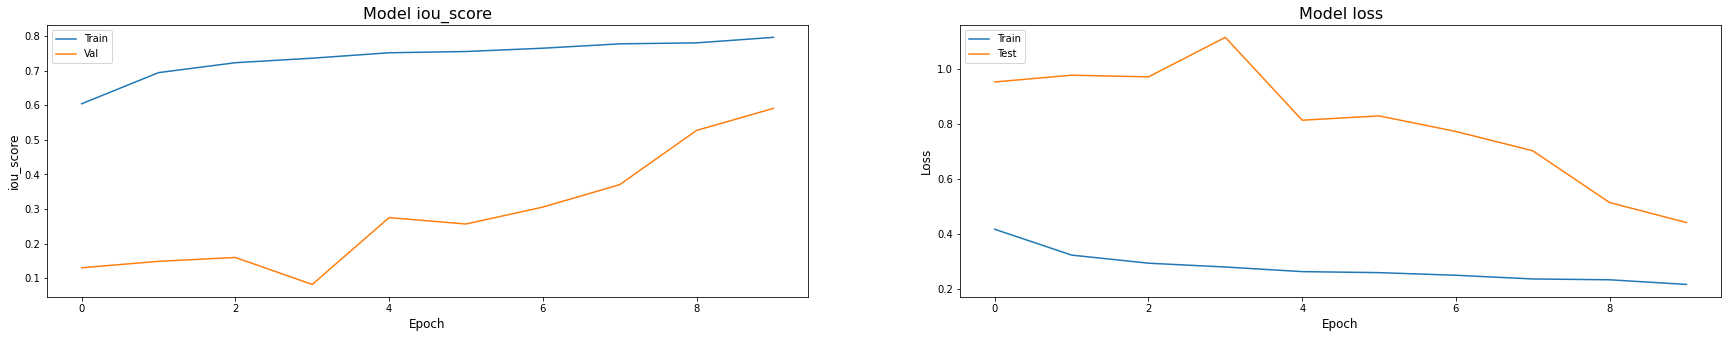

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score', fontsize=16)
plt.ylabel('iou_score', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

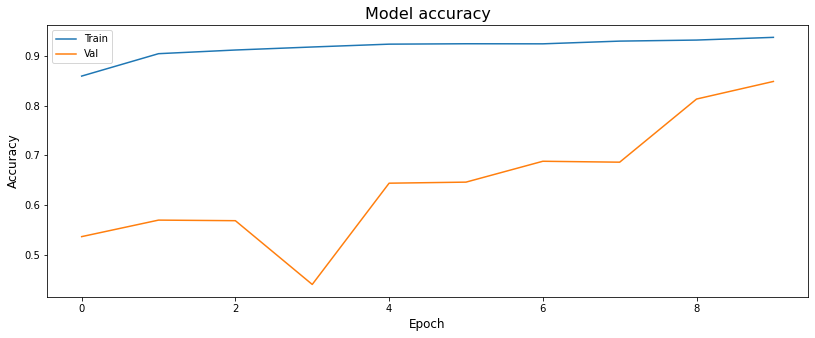

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

# 5. Modèle combiné VGG16-Unet 


In [25]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

K.clear_session()

EPOCHS = 20
BACKBONE = 'vgg16'
n_classes = 8
preprocess_input = sm.get_preprocessing(BACKBONE)


model = sm.Unet(BACKBONE, classes=n_classes, encoder_weights='imagenet',
                activation='softmax')
model.compile('Adam',
              loss=sm.losses.bce_jaccard_loss,
              metrics=[sm.metrics.iou_score, "accuracy"])
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
_____________________________

### Sauvegarde du modèle

In [26]:
mc = ModelCheckpoint(mode='max', filepath='/content/models/vgg16_unet.h5',
                     monitor='iou_score', save_best_only='True', verbose=1)
es = EarlyStopping(mode='max', monitor='iou_score', patience=2, verbose=1)
rl = ReduceLROnPlateau(monitor='loss',
                       patience=2, 
                       cooldown=0)

callbacks_list = [mc, es, rl]

### Entrainement du modèle

In [27]:
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    epochs=10,
                    callbacks=callbacks_list)

Epoch 1/10
92/92 [==============================] - 1150s 12s/step - loss: 0.9591 - iou_score: 0.3078 - accuracy: 0.6838 - val_loss: 1.0010 - val_iou_score: 0.2698 - val_accuracy: 0.6312

Epoch 00001: iou_score improved from -inf to 0.30782, saving model to /content/models/vgg16_unet.h5
Epoch 2/10
92/92 [==============================] - 1146s 12s/step - loss: 0.5851 - iou_score: 0.5250 - accuracy: 0.8572 - val_loss: 1.1159 - val_iou_score: 0.2564 - val_accuracy: 0.5717

Epoch 00002: iou_score improved from 0.30782 to 0.52496, saving model to /content/models/vgg16_unet.h5
Epoch 3/10
92/92 [==============================] - 1142s 12s/step - loss: 0.5176 - iou_score: 0.5793 - accuracy: 0.8763 - val_loss: 0.9558 - val_iou_score: 0.3298 - val_accuracy: 0.6777

Epoch 00003: iou_score improved from 0.52496 to 0.57925, saving model to /content/models/vgg16_unet.h5
Epoch 4/10
92/92 [==============================] - 1140s 12s/step - loss: 0.4657 - iou_score: 0.6209 - accuracy: 0.8896 - val_los

### Performance du modèle

In [28]:
best_model_ft = tf.keras.models.load_model('/content/models/vgg16_unet.h5',
                                           custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                           'iou_score': sm.metrics.iou_score},
                                                           compile=False)

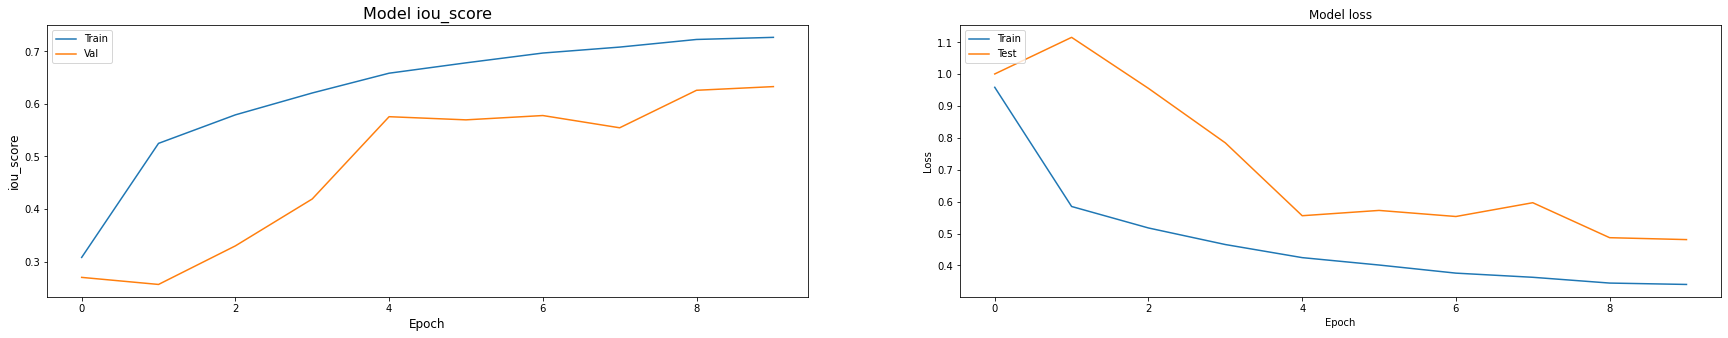

In [29]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score', fontsize=16)
plt.ylabel('iou_score', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

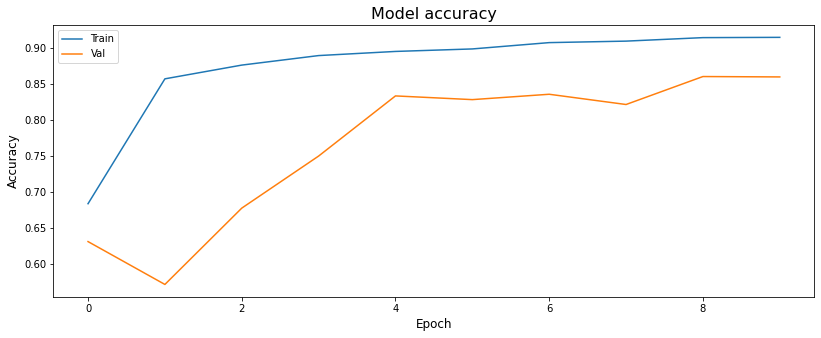

In [30]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Val'], loc='upper left')

# 6. Comparaison des différents modèles

On sauvegarde le modèle qui a le meilleur score de IoU de validation. Le score **Intersection over Union** sert à mésurer l'adéquation entre l'image segmentée et l'image réelle, elle est plus adapté pour la segmentation sémantique que ne peut l'être la précision.

## Pour le modèle **Unet**

In [37]:
model_1 = tf.keras.models.load_model('/content/models/unet.h5',
                                   custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                   'iou_score': sm.metrics.iou_score})
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        dropout[0][0]                    
______________________________________________________________________________________________

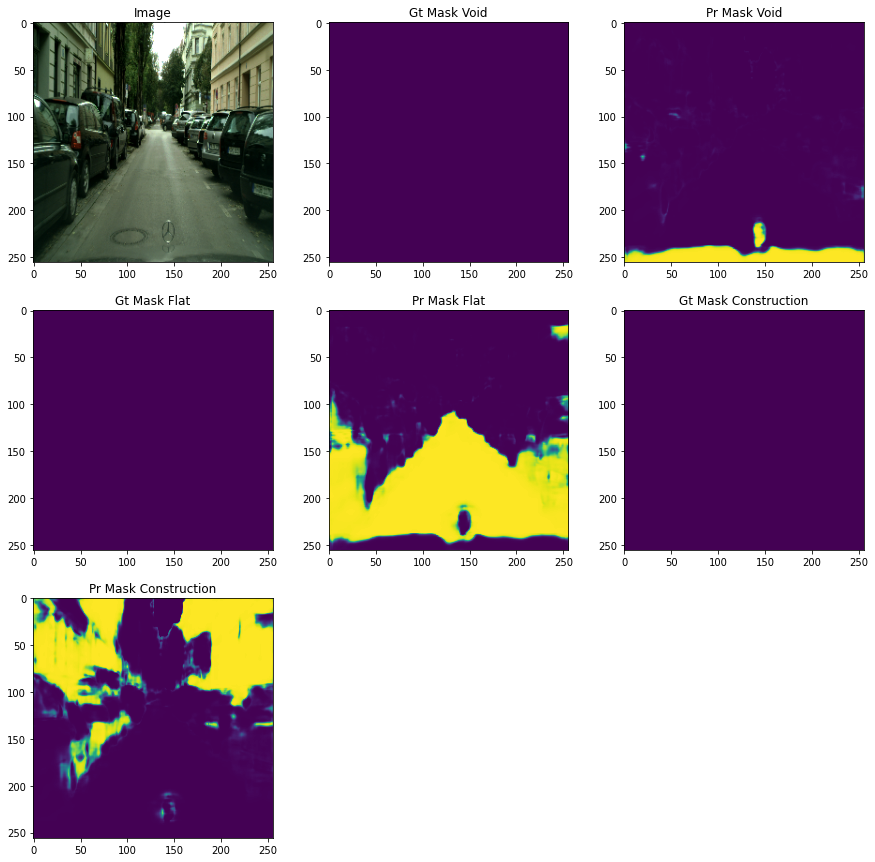

In [42]:
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    fig = plt.figure(figsize=(15, 15))
    for i, (name, image) in enumerate(images.items()):
        ax = fig.add_subplot(3, 3, i + 1)
        ax.set_title(' '.join(name.split('_')).title())
        ax.imshow(image)
    plt.show()

n = 1
ids = np.random.choice(np.arange(len(test_generator)), size=n)
for i in ids:
    image, gt_mask = test_generator[i]
    pr_mask = model_1.predict(image)
    pr_mask = pr_mask[0,:,:,:]
    gt_mask = gt_mask[0,:,:,:]
    image = image[0,:,:,:]
    visualize(
        image=denormalize(image),
        gt_mask_void=gt_mask[...,0],
        pr_mask_void=pr_mask[...,0],
        gt_mask_flat=gt_mask[...,1],
        pr_mask_flat=pr_mask[...,1],
        gt_mask_construction=gt_mask[...,2],
        pr_mask_construction=pr_mask[...,2],
#        gt_mask_object=gt_mask[3],
#        pr_mask_object=pr_mask[...,3].squeeze(),
#        gt_mask_nature=gt_mask[4],
#        pr_mask_nature=pr_mask[...,4].squeeze(),
#        gt_mask_sky=gt_mask[5],
#        pr_mask_sky=pr_mask[...,5].squeeze(),
#        gt_mask_human=gt_mask[6],
#        pr_mask_human=pr_mask[...,6].squeeze(),
#        gt_mask_vehicle=gt_mask[7],
#        pr_mask_vehicle=pr_mask[...,7].squeeze(),

    )

## Pour le modèle **VGG16_Unet**

In [39]:
model_2 = tf.keras.models.load_model('/content/models/vgg16_unet.h5',
                                           custom_objects={'focal_loss_plus_jaccard_loss': sm.losses.categorical_focal_jaccard_loss,
                                                           'iou_score': sm.metrics.iou_score},
                                           compile=False)
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
______________________________________________________________________________________________

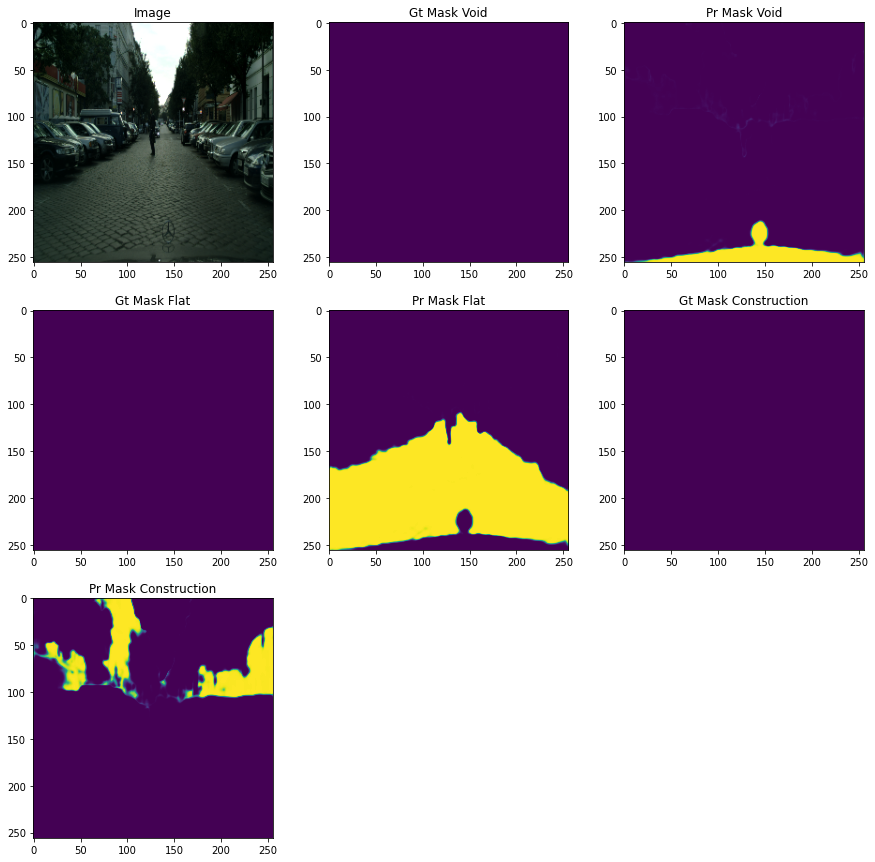

In [44]:
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    fig = plt.figure(figsize=(15, 15))
    for i, (name, image) in enumerate(images.items()):
        ax = fig.add_subplot(3, 3, i + 1)
        ax.set_title(' '.join(name.split('_')).title())
        ax.imshow(image)
    plt.show()

n = 1
ids = np.random.choice(np.arange(len(test_generator)), size=n)
for i in ids:
    image, gt_mask = test_generator[i]
    pr_mask = model_2.predict(image)
    pr_mask = pr_mask[0,:,:,:]
    gt_mask = gt_mask[0,:,:,:]
    image = image[0,:,:,:]
    visualize(
        image=denormalize(image),
        gt_mask_void=gt_mask[...,0],
        pr_mask_void=pr_mask[...,0],
        gt_mask_flat=gt_mask[...,1],
        pr_mask_flat=pr_mask[...,1],
        gt_mask_construction=gt_mask[...,2],
        pr_mask_construction=pr_mask[...,2],
#        gt_mask_object=gt_mask[3],
#        pr_mask_object=pr_mask[...,3].squeeze(),
#        gt_mask_nature=gt_mask[4],
#        pr_mask_nature=pr_mask[...,4].squeeze(),
#        gt_mask_sky=gt_mask[5],
#        pr_mask_sky=pr_mask[...,5].squeeze(),
#        gt_mask_human=gt_mask[6],
#        pr_mask_human=pr_mask[...,6].squeeze(),
#        gt_mask_vehicle=gt_mask[7],
#        pr_mask_vehicle=pr_mask[...,7].squeeze(),

    )